Back to the main [Index](../index.ipynb)

# Postprocessing tools for Many-Body calculations with ABINIT

The $GW$ code saves the results of the calculation in the `SIGRES.nc` file produced at the end of the `SIGMA` run (`optdriver` 4).
The Bethe-Salpeter code saves the optical spectra in the `MDF.nc` file. 
In this notebook, we will explain how to use `abipy` and `matplotlib` to visualize the results produce by the Many-Body code. 
Let's start by importing the basic modules we'll use for this tutorial.

In [2]:
from __future__ import division, print_function, unicode_literals

import abipy.data as abidata
import seaborn  # Activate seaborn settings (optional)

from abipy import abilab
from abipy.abilab import abiopen

# This line configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. 
%matplotlib notebook

## How to visualize QP corrections  

In [13]:
sigma_file = abiopen(abidata.ref_file("tgw1_9o_DS4_SIGRES.nc"))

monkhorst_pack_folding variables has not been written to netcdf file.
Received [-2147483647 -2147483647 -2147483647]
Set mpdivs to None, this could create problems in post-processing tools.
If needed, use python netcdf to change the value of `monkhorst_pack_folding`


<IPython.core.display.Javascript object>


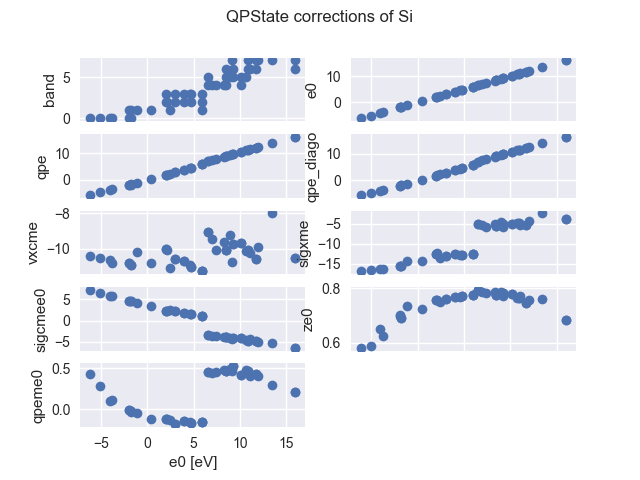

In [15]:
qplist_spin = sigma_file.qplist_spin
qplist_spin[0].plot_qps_vs_e0(title="QPState corrections of Si", exclude_fields="vUme");

In [16]:
sigma_file.close()

## Convergence of the QP corrections  

This example shows how to visualize the convergence of the QP results stored in the `SIGRES` produced by the $GW$ code (sigma run).

monkhorst_pack_folding variables has not been written to netcdf file.
Received [-2147483647 -2147483647 -2147483647]
Set mpdivs to None, this could create problems in post-processing tools.
If needed, use python netcdf to change the value of `monkhorst_pack_folding`
monkhorst_pack_folding variables has not been written to netcdf file.
Received [-2147483647 -2147483647 -2147483647]
Set mpdivs to None, this could create problems in post-processing tools.
If needed, use python netcdf to change the value of `monkhorst_pack_folding`
monkhorst_pack_folding variables has not been written to netcdf file.
Received [-2147483647 -2147483647 -2147483647]
Set mpdivs to None, this could create problems in post-processing tools.
If needed, use python netcdf to change the value of `monkhorst_pack_folding`


<IPython.core.display.Javascript object>


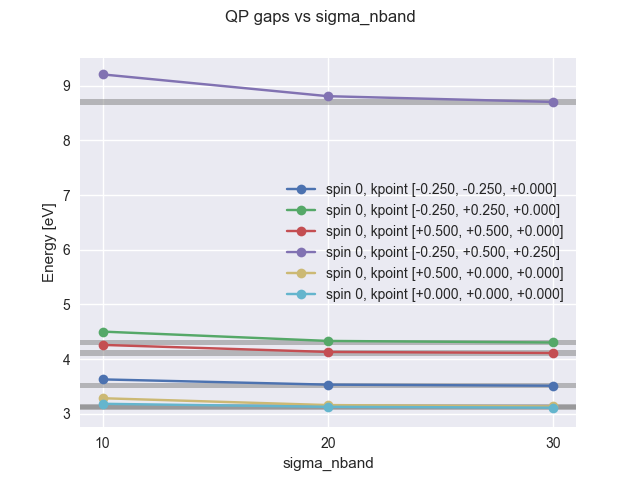

In [17]:
# List of SIGRES files computed with different values of nband.
filenames = [
    "si_g0w0ppm_nband10_SIGRES.nc",
    "si_g0w0ppm_nband20_SIGRES.nc",
    "si_g0w0ppm_nband30_SIGRES.nc",
]

filepaths = [abidata.ref_file(fname) for fname in filenames]

# Instantiate the plotter and add the filepaths to the plotter.
plotter = abilab.SigresPlotter()
plotter.add_files(filepaths)

# Plot the convergence of the QP gaps.
figure = plotter.plot_qpgaps(title="QP gaps vs sigma_nband", hspan=0.05)

# Plot the convergence of the QP energies.
#plotter.plot_qpenes(title="QP energies vs sigma_nband", hspan=0.05)

<IPython.core.display.Javascript object>


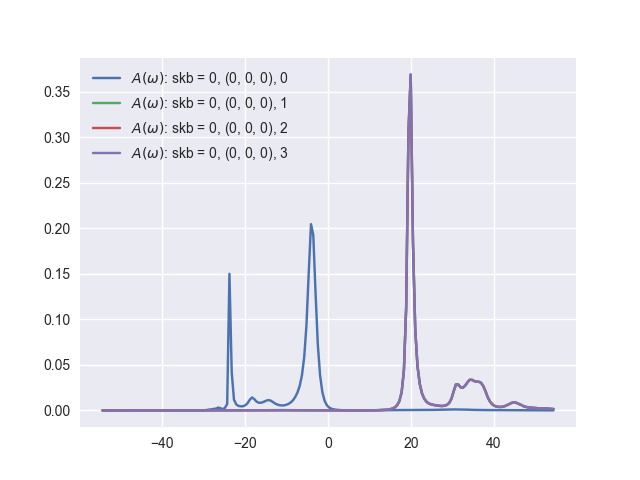

In [18]:
# This examples shows how to plot the G0W0 spectral functions A(w)
# at the gamma point, for the first band). See lesson tgw2_4

# Open the file with the GW results
sigma_file = abiopen(abidata.ref_file("al_g0w0_sigmaw_SIGRES.nc"))

# Plot A(w) for the first spin, the gamma point, and bands in [0,1,2,3]
sigma_file.plot_spectral_functions(spin=0, kpoint=(0,0,0), bands=range(0,4))
sigma_file.close()

## Bethe-Salpeter calculations

<IPython.core.display.Javascript object>


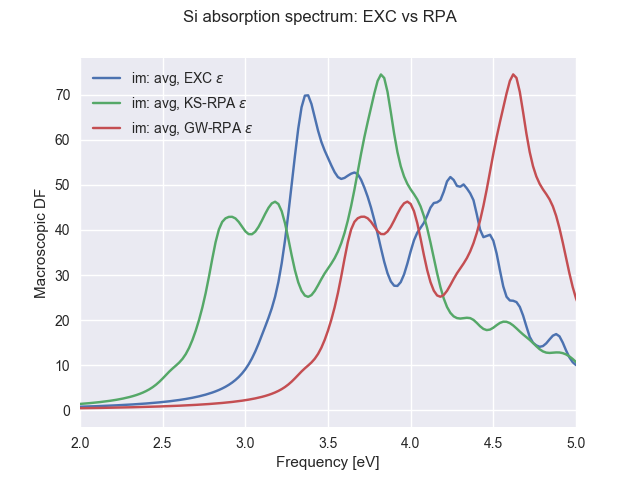

In [19]:
# Open the MDF file produced in the tutorial.
mdf_file = abiopen(abidata.ref_file("tbs_4o_DS2_MDF.nc"))

# Plot the imaginary part of the macroscopic dielectric function (EXC, RPA, GWRPA) 
# between 2 and 5 eV.
mdf_file.plot_mdfs(title="Si absorption spectrum: EXC vs RPA", xlims=(2, 5));

In [20]:
mdf_file.close()